In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

df['species']=df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

df.shape

(150, 6)

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [30]:
sl = df['sepal length (cm)']
sl.tail()

145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), dtype: float64

In [31]:
np.mean(sl), np.median(sl)

(5.843333333333335, 5.8)

## percentile

Create percentiles, a NumPy array of percentiles you want to compute. These are the 2.5th, 25th, 50th, 75th, and 97.5th. You can do so by creating a list containing these ints/floats and convert the list to a NumPy array using np.array(). For example, np.array([30, 50]) would create an array consisting of the 30th and 50th percentiles.

In [32]:
np.percentile(sl, [10, 25, 50, 75, 99])

array([4.8, 5.1, 5.8, 6.4, 7.7])

In [33]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)

    return x, y


### Comparing percentiles to ECDF
To see how the percentiles relate to the ECDF,  plot the percentiles of Iris versicolor petal lengths 

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100

In [34]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [35]:
pl = df['petal length (cm)']

In [36]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(pl, percentiles)

# Print the result
print(ptiles_vers)

[1.2725 1.6    4.35   5.1    6.455 ]


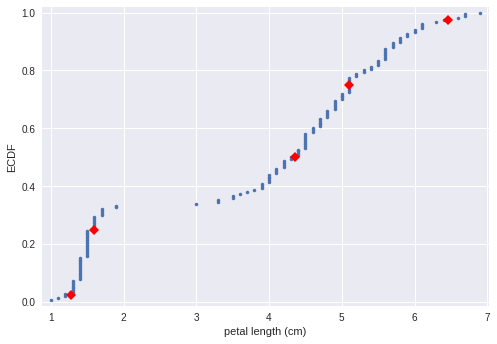

In [37]:
# Plot the ECDF

x_vers, y_vers = ecdf(pl)

_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')


# Overlay percentiles as red x's
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

## Box-and-whisker plot
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. 


/home/saya/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


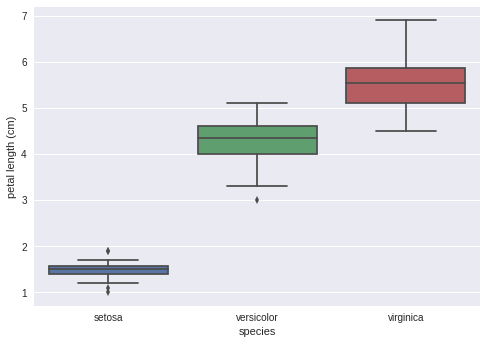

In [38]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


### Computing the variance
It is important to have some understanding of what commonly-used functions are doing under the hood. 

we will explicitly compute the variance of the petal length of Iris. 

We will then use np.var() to compute it.

<img src=https://www.wikihow.com/images/thumb/a/a7/Calculate-Variance-Step-10.jpg/aid867321-v4-728px-Calculate-Variance-Step-10.jpg width="500" style="float: left;">


In [42]:
# Array of differences to mean: differences
differences = pl - np.mean(pl)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(pl)

# Print the results
print(variance_explicit, variance_np)


(3.0924248888888854, 3.0924248888888854)


### The standard deviation and the variance
the standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using np.std() and comparing it to what you get by computing the variance with np.var() and then computing the square root.

In [53]:
# Compute the variance: variance
variance = np.var(pl)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(pl))

1.7585291834055201
1.75852918341


### Scatter plots
When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

In [54]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [55]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

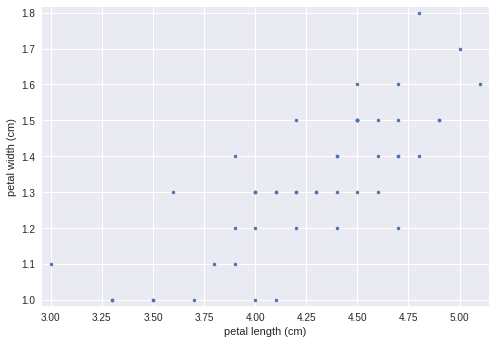

In [57]:
# Make a scatter plot
_ = plt.plot(df['petal length (cm)'][df['species']=='versicolor'], 
             df['petal width (cm)'][df['species']=='versicolor'],
             marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()


https://www.countbayesie.com/blog/2015/2/21/variance-co-variance-and-correlation

### Computing the covariance
The covariance may be computed using the Numpy function np.cov(). 

For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. 

This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

To remind you how the I. versicolor petal length and width are related, we include the scatter plot you generated in a previous exercise.

In [58]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(df['petal length (cm)'][df['species']=='versicolor'],  
                           df['petal width (cm)'][df['species']=='versicolor'])

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [62]:
np.cov([1,2,3],[4,9,2])

array([[ 1., -1.],
       [-1., 13.]])

### Computing the Pearson correlation coefficient
the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. 

It is computed using the np.corrcoef() function.

Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In this exercise, you will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.



In [67]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    print corr_mat
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
r = pearson_r(df['petal length (cm)'][df['species']=='versicolor'],
              df['petal width (cm)'][df['species']=='versicolor'])

# Print the result
print(r)


[[1.         0.78666809]
 [0.78666809 1.        ]]
0.7866680885228169
